<a href="https://colab.research.google.com/github/rajdeepd/tensorflow_2.0_book_code/blob/master/ch03/functional_apis_basic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras import Model
from tensorflow.keras.datasets import mnist
from tensorflow import keras
#from tensorflow.keras.utils import np_utils (np_utils not available in keras)
from tensorflow.keras import utils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(y_train.shape)

y_train = utils.to_categorical(y_train, nb_classes)
y_test = utils.to_categorical(y_test, nb_classes)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(60000,)


In [3]:
input_size = 784
hidden_size = 64
output_size = 784

In [5]:
import numpy as np
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
#len(X_train)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [4]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [6]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                          validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0449 - val_loss: 0.0226
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0173 - val_loss: 0.0130
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0109 - val_loss: 0.0087
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0063 - val_loss: 0.0056


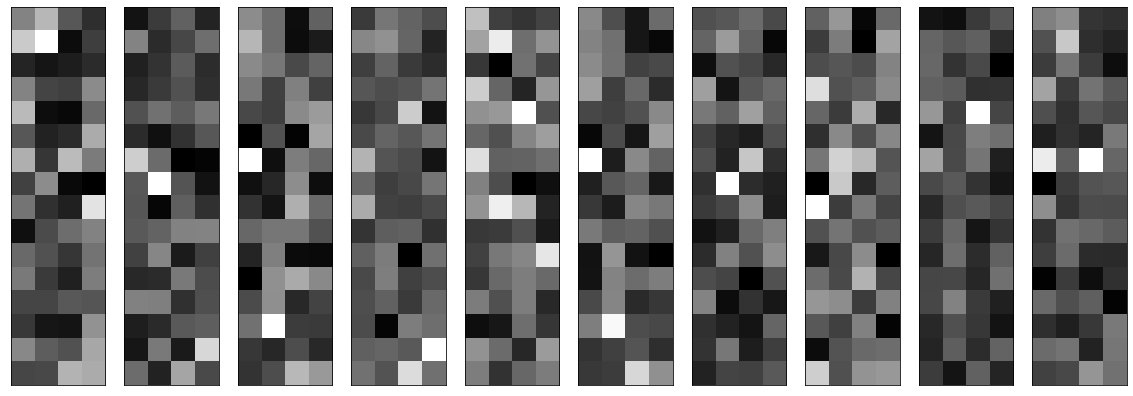

In [ ]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
decoded_imgs = autoencoder.predict(X_test)

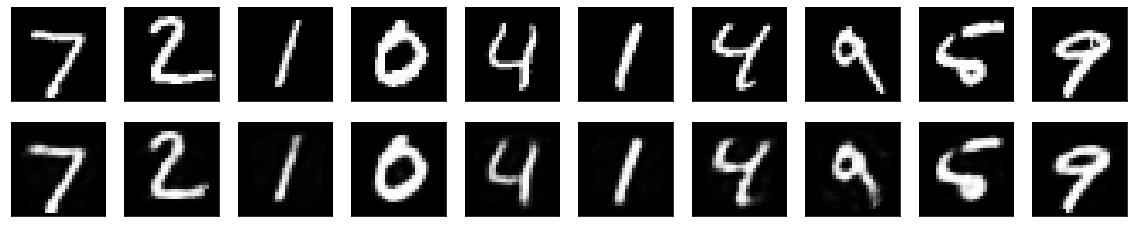

In [8]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

---

dict_keys(['loss', 'val_loss'])


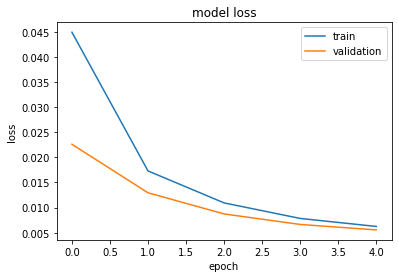

In [9]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## AutoEncoder 2

In [10]:
x = Input(shape=(input_size,))
h1 = Dense(hidden_size, activation='relu')(x)
h2 = Dense(hidden_size, activation='relu')(h1)
r = Dense(output_size, activation='sigmoid')(h2)

autoencoder2 = Model(inputs=x, outputs=r)
autoencoder2.compile(optimizer='adam', loss='mse')

In [11]:
epochs = 5
batch_size = 128

history2 = autoencoder2.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                          validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0459 - val_loss: 0.0240
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0190 - val_loss: 0.0148
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0134 - val_loss: 0.0116
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0110 - val_loss: 0.0098
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0095 - val_loss: 0.0087


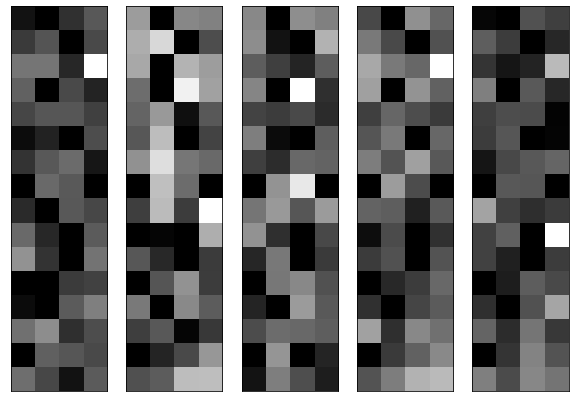

In [12]:
conv_encoder2 = Model(x, h1)
encoded_imgs2 = conv_encoder2.predict(X_test)

n = 5
plt.figure(figsize=(10, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs2[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
decoded_imgs2 = autoencoder2.predict(X_test)

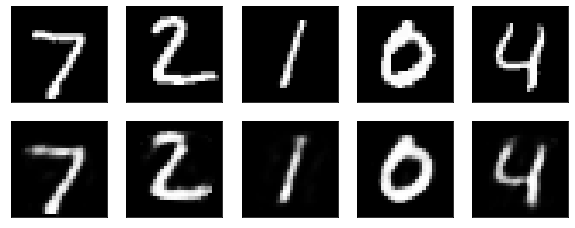

In [14]:
n = 5
plt.figure(figsize=(10, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

dict_keys(['loss', 'val_loss'])


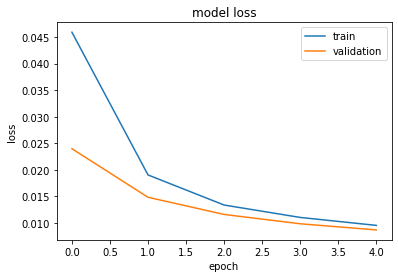

In [15]:
print(history2.history.keys())

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()